In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [4]:
local_directory = "/mnt/d/zrive-ds/src/module_2/files_downloaded"

In [ ]:
import sys
print(sys.executable)

/mnt/d/zrive-ds/.venv/bin/python


In [7]:
def load_data(list_of_files):
    dataframes = []
    
    for file in list_of_files:
        file_path = os.path.join(local_directory, file)

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        try:
            if file.endswith(".parquet"):
                print(f"Loading Parquet file: {file}")
                df = pd.read_parquet(file_path)
            elif file.endswith(".csv"):
                print(f"Loading CSV file: {file}")
                df = pd.read_csv(file_path)
            else:
                print(f"Unsupported file format: {file}")
                continue

            dataframes.append(df)
            print(f"Successfully loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns.")

        except Exception as e:
            print(f"Error loading {file}: {e}")

    return dataframes

In [6]:
orders = load_data(["orders.parquet"])[0]

Loading Parquet file: orders.parquet
Successfully loaded orders.parquet with 8773 rows and 6 columns.


In [7]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."
51,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402..."
53,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254..."
61,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416..."
68,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166..."
70,2224765862020,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,2020-05-06 16:03:35,2020-05-06,1,"[33667174695044, 33667203596420, 3366720589018..."


In [8]:
orders.describe()["user_order_seq"]

count    8773.000000
mean        2.445116
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        25.000000
std         2.707693
Name: user_order_seq, dtype: float64

In [9]:
orders["order_date"].min()

Timestamp('2020-04-30 00:00:00')

In [10]:
orders["order_date"].max()

Timestamp('2022-03-14 00:00:00')

In [11]:
orders["user_order_seq"].value_counts()

user_order_seq
1     4983
2     1411
3      713
4      462
5      314
6      225
7      167
8      121
9       89
10      66
11      51
12      38
13      31
14      25
15      15
16      14
17      12
18       9
19       8
20       7
21       6
22       3
23       1
24       1
25       1
Name: count, dtype: int64

In [12]:
orders['list_length'] = orders['ordered_items'].apply(len)
length_count_orders = orders['list_length'].value_counts().sort_index()
length_count_orders

list_length
1        6
2       54
3       82
4      349
5      510
      ... 
67       2
68       1
70       1
71       1
114      1
Name: count, Length: 63, dtype: int64

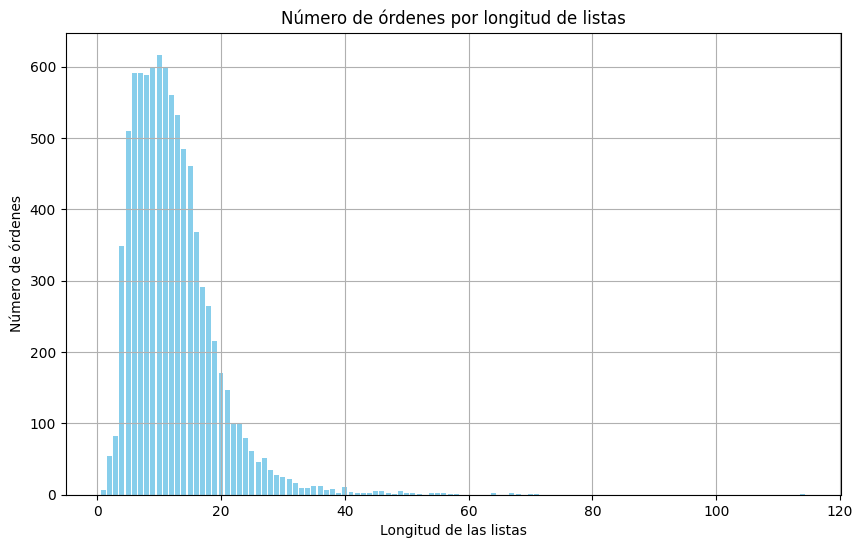

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(length_count_orders.index, length_count_orders.values, color='skyblue')
plt.xlabel('Longitud de las listas')
plt.ylabel('Número de órdenes')
plt.title('Número de órdenes por longitud de listas')
plt.grid(axis='x')
plt.grid(axis='y')

plt.show()

In [14]:
product_count_orders = {}
for list_of_order in orders['ordered_items']:
    for num in list_of_order:
        if num in product_count_orders:
            product_count_orders[num] += 1
        else:
            product_count_orders[num] = 1
            
sorted_products = sorted(product_count_orders.items(), key=lambda x: x[1], reverse=True) 
top_5_products = sorted_products[:5]

top_5_products

[(34081589887108, 4487),
 (39284117930116, 2658),
 (34137590366340, 1459),
 (34081331970180, 1170),
 (34284951863428, 1133)]

In [15]:

total_items_ordered = (length_count_orders*length_count_orders.index).sum()
total_items_ordered

107958

In [16]:
def calculate_relative_weight(sorted_products, total_items_ordered, top_n):
    '''
    Returns the percentage of products ordered coming from the top n products sold.
    '''
    top_n_products = sorted_products[:top_n]
    top_n_sum = sum([count for product, count in top_n_products])
    return (top_n_sum / total_items_ordered) * 100



In [17]:
top_5_sum = calculate_relative_weight(sorted_products, total_items_ordered, 5)
top_10_sum = calculate_relative_weight(sorted_products, total_items_ordered, 10)
top_20_sum = calculate_relative_weight(sorted_products, total_items_ordered, 20)

print("\nPeso relativo de los top productos (en porcentaje):")
print("Top 5 products:", top_5_sum)
print("Top 10 products:", top_10_sum)
print("Top 20 products:", top_20_sum)


Peso relativo de los top productos (en porcentaje):
Top 5 products: 10.103003019692844
Top 10 products: 14.084180885159043
Top 20 products: 19.46405083458382


In [18]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

orders['year_month'] = orders['order_date'].dt.to_period('M')

monthly_count_orders = orders['year_month'].value_counts().sort_index()
monthly_count_orders

year_month
2020-04       3
2020-05      25
2020-06      42
2020-07      58
2020-08      66
2020-09      96
2020-10     123
2020-11     152
2020-12     175
2021-01     390
2021-02     374
2021-03     397
2021-04     391
2021-05     408
2021-06     412
2021-07     335
2021-08     345
2021-09     359
2021-10     754
2021-11     903
2021-12     716
2022-01    1080
2022-02     891
2022-03     278
Freq: M, Name: count, dtype: int64

In [19]:
regulars = load_data(["regulars.parquet"])[0]

Loading Parquet file: regulars.parquet
Successfully loaded regulars.parquet with 18105 rows and 3 columns.


In [20]:
regulars.info()
regulars.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11
48,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,33618909495428,2020-04-30 13:09:27
50,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618991415428,2020-04-30 15:07:03
51,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,33618998853764,2020-04-30 17:06:48
87,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667182493828,2020-05-06 14:42:11
107,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,33618846580868,2020-04-30 17:06:48


In [21]:
regulars["created_at"].min()

Timestamp('2020-04-30 13:09:27')

In [22]:
regulars["created_at"].max()

Timestamp('2022-03-14 07:49:24')

In [23]:
regulars['created_at'] = pd.to_datetime(regulars['created_at'])

regulars['year_month'] = regulars['created_at'].dt.to_period('M')

monthly_count_regulars = regulars['year_month'].value_counts().sort_index()
monthly_count_regulars

year_month
2020-04      61
2020-05     147
2020-06     167
2020-07     358
2020-08     194
2020-09     135
2020-10     317
2020-11     419
2020-12     324
2021-01     957
2021-02     716
2021-03    1042
2021-04     586
2021-05     497
2021-06     518
2021-07     518
2021-08     721
2021-09     863
2021-10    1001
2021-11    1590
2021-12    1423
2022-01    2682
2022-02    1842
2022-03    1027
Freq: M, Name: count, dtype: int64

In [24]:
product_count_regulars = {}
for elem in regulars['variant_id']:
        if elem in product_count_regulars:
            product_count_regulars[elem] += 1
        else:
            product_count_regulars[elem] = 1
            
sorted_products_regulars = sorted(product_count_regulars.items(), key=lambda x: x[1], reverse=True) 
top_15_products_regulars = sorted_products_regulars[:15]

top_15_products_regulars

[(34081589887108, 253),
 (34370361229444, 127),
 (33973249081476, 114),
 (34370915041412, 112),
 (34284951863428, 105),
 (33667282436228, 101),
 (34284949766276, 96),
 (34284950356100, 94),
 (34037939372164, 89),
 (34436055302276, 85),
 (34284951273604, 80),
 (33667302555780, 78),
 (33973246853252, 77),
 (33667247407236, 74),
 (33667207266436, 69)]

In [25]:
total_regulars = len(regulars.index)

top_5_sum_regulars = calculate_relative_weight(sorted_products_regulars, total_regulars, 5)
top_10_sum_regulars = calculate_relative_weight(sorted_products_regulars, total_regulars, 10)
top_20_sum_regulars = calculate_relative_weight(sorted_products_regulars, total_regulars, 20)

print("\nPeso relativo de los top regulars (en porcentaje):")
print("Top 5 regulars:", top_5_sum_regulars)
print("Top 10 regulars:", top_10_sum_regulars)
print("Top 20 regulars:", top_20_sum_regulars)


Peso relativo de los top regulars (en porcentaje):
Top 5 regulars: 3.927091963545982
Top 10 regulars: 6.495443247721624
Top 20 regulars: 10.383871858602596


In [26]:
regulars["user_id"].value_counts()[:10]

user_id
a124c8bb0453ea0957405b7a08a7fd377247bac054a097e7c081463f5f3f9dc641ce4caecaabfa32a16a758564b915a7e2d9827a2d2b06f08377b53fd2f536db    726
ba068a3398230c10a98868ced1fcc5b889b21e6f112fd02f33de803a8889a6f0f0df38680ca3389322bc9594f4d09454ce9b13378796b1a5040d03d3c1292171    499
9b5b3679033da9e1f3a4def18667e40a7763d0d3ec9d8fb50cf1d98ed5f5ef30e2c64a66774b69d8d4582f581ad07061c83323cf507276f9e760f2987cecee31    405
257be7ae940425880bbb20bf162c2616b32881bf0a8bda4e4ce7f5ce0356c29b06e032dd593030a460d20c71353737305e51431a7df58ea0284c67c95084a42b    389
9a4b53affbe91ca5fd0c97f6d86e8a59ae894f3c7a69a830a400911d45ae40f5bffeeeabc80e7a28bd8a28bab9b19fe5338811e80cbc12b8f48cf58458d3af6a    372
0af18ff445827d3b373d87754ed90db1fe4924525d552b9369d31ad26e2726a9780e6aa4b17ed573851fa8fa8bd23d2636d8c0ba478c016db03820e9ba201a98    348
4481102740bca52c40ca264bf88c39f0bc7d1f461b06291d06a58063e24815711ed4cd21f37acf601d20977e3ba5891c0c5e2b061534c5f9a86d458cb22b268c    313
46470d0d117e4b2740ad9bf2bbb54b8231212d08

In [27]:
regulars.groupby('user_id')['variant_id'].nunique().sort_values(ascending=False)

user_id
9a4b53affbe91ca5fd0c97f6d86e8a59ae894f3c7a69a830a400911d45ae40f5bffeeeabc80e7a28bd8a28bab9b19fe5338811e80cbc12b8f48cf58458d3af6a    320
9b5b3679033da9e1f3a4def18667e40a7763d0d3ec9d8fb50cf1d98ed5f5ef30e2c64a66774b69d8d4582f581ad07061c83323cf507276f9e760f2987cecee31    110
11c967ad95d1e3a8f9767612e2f084aad75832cf019f8a232279b0f3b15388ee906988eea6ecee027ef43a5acb69b6c9290cc8ff5a322853c8734cfc3b719a55     90
af86901cbe9be971840f20e73e8af9d733f0887163f331993e2dafed0d95fe557af64651845a1df0a0c4dca1dae5f611ed2c18d0f92a88f2c9277ae5da7986cb     88
27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9e1a530e15343ab53424ef69712a0ad5cb454a841e168102a6334bb3fa24153a27d7451c771decfdd8e     85
                                                                                                                                   ... 
86bb9be63edb2553497ed881b31412a6698571f61e9020b3103ee393f518d18e39c44b0a53b22b606a686be7b0d7dad94db824cc53d7d963b0f038be68df0f9a      1
86c2b1abd0ee950ab2f69638e0675fa38687f3fe

In [28]:
abandoned_carts = load_data(["abandoned_carts.parquet"])[0]

Loading Parquet file: abandoned_carts.parquet
Successfully loaded abandoned_carts.parquet with 5457 rows and 4 columns.


In [29]:
abandoned_carts.info()
abandoned_carts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [30]:
abandoned_carts["created_at"].min()

Timestamp('2020-05-20 13:53:24')

In [31]:
abandoned_carts["created_at"].max()

Timestamp('2022-03-13 14:12:10')

In [32]:
abandoned_carts['created_at'] = pd.to_datetime(abandoned_carts['created_at'])

abandoned_carts['year_month'] = abandoned_carts['created_at'].dt.to_period('M')

monthly_count_abandoned_carts = abandoned_carts['year_month'].value_counts().sort_index()
monthly_count_abandoned_carts

year_month
2020-05       1
2021-06       1
2021-07      25
2021-08     135
2021-09     248
2021-10     560
2021-11     988
2021-12     871
2022-01    1318
2022-02     989
2022-03     321
Freq: M, Name: count, dtype: int64

In [33]:
abandoned_carts['list_length'] = abandoned_carts['variant_id'].apply(len)
length_count_abandoned_carts = abandoned_carts['list_length'].value_counts().sort_index()
length_count_abandoned_carts

list_length
1     814
2     895
3     611
4     533
5     427
6     383
7     322
8     247
9     223
10    211
11    166
12    161
13    105
14     79
15     54
16     56
17     34
18     30
19     25
20     13
21     15
22      7
23      9
24     11
25      3
26      2
27      3
28      4
29      3
30      1
31      2
33      3
36      1
38      2
40      1
42      1
Name: count, dtype: int64

In [ ]:
exploded_df_abandoned_carts = abandoned_carts.explode('variant_id')

variant_counts_abandoned_carts = exploded_df_abandoned_carts['variant_id'].value_counts().reset_index()

variant_counts_abandoned_carts[:10]

,variant_id,count
0,34081589887108,608
1,34284951863428,478
2,34284950356100,409
3,34137590366340,395
4,34284949766276,382
5,34284950519940,307
6,34284950454404,306
7,39459279929476,305
8,39284117930116,298
9,34037939372164,290


In [35]:
inventory = load_data(["inventory.parquet"])[0]

Loading Parquet file: inventory.parquet
Successfully loaded inventory.parquet with 1733 rows and 6 columns.


In [36]:
inventory.info()
inventory.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [37]:
inventory["price"].describe()

count    1733.000000
mean        6.307351
std         7.107218
min         0.000000
25%         2.490000
50%         3.990000
75%         7.490000
max        59.990000
Name: price, dtype: float64

In [38]:
inventory["compare_at_price"].describe()

count    1733.000000
mean        7.028881
std         7.660542
min         0.000000
25%         2.850000
50%         4.490000
75%         8.210000
max        60.000000
Name: compare_at_price, dtype: float64

In [39]:
no_price_info_products_inventory = inventory[inventory['price'] == 0]

no_price_info_products_inventory

,variant_id,price,compare_at_price,vendor,product_type,tags
95,40070658490500,0.0,0.0,jordans,cereal,[cereal-bars]
96,40167931674756,0.0,0.0,whogivesacrap,,[]
97,40167931707524,0.0,0.0,whogivesacrap,,[]
99,40070656786564,0.0,0.0,mcvities,biscuits-crackers,"[biscuits, pm]"
100,40070657933444,0.0,0.0,astonish,cleaning-products,[bathroom-limescale-cleaner]
...,...,...,...,...,...,...
1554,40070660292740,0.0,0.0,biona,biscuits-crackers,[crackers]
1575,40070658654340,0.0,0.0,lovecorn,snacks-confectionery,[savoury-snacks]
1623,40070660587652,0.0,0.0,snackajack,biscuits-crackers,[crackers]
1627,40070660489348,0.0,0.0,garnier,skincare,[facial-skincare]


In [ ]:

intervals = [i for i in range(0, 20)] + [i for i in range(20, int(inventory['price'].max()) + 10, 10)]


inventory['price_range'] = pd.cut(inventory['price'], bins=intervals, right=False)

price_range_counts_inventory = inventory['price_range'].value_counts().sort_index().reset_index()

price_range_counts_inventory

,price_range,count
0,"[0, 1)",130
1,"[1, 2)",211
2,"[2, 3)",303
3,"[3, 4)",237
4,"[4, 5)",213
5,"[5, 6)",132
6,"[6, 7)",61
7,"[7, 8)",54
8,"[8, 9)",51
9,"[9, 10)",54


In [41]:
inventory["compare_at_price"].max()

60.0

In [42]:
inventory["compare_at_price"].min()

0.0

In [43]:
inventory["price_dif"] = inventory["compare_at_price"] - inventory["price"]
inventory["price_dif"]

0       0.06
1       0.51
2       0.30
3       0.20
4       0.10
        ... 
1728    1.00
1729    0.80
1730    1.76
1731    2.16
1732    2.61
Name: price_dif, Length: 1733, dtype: float64

In [44]:
inventory['price_dif'] = inventory.apply(
    lambda row: 0 if row['price'] == 0 else (row['compare_at_price'] - row['price']) / row['price'],
    axis=1
)
inventory[["variant_id", "price", "compare_at_price", "price_dif"]]

,variant_id,price,compare_at_price,price_dif
0,39587297165444,3.09,3.15,0.019417
1,34370361229444,4.99,5.50,0.102204
2,34284951863428,3.69,3.99,0.081301
3,33667283583108,1.79,1.99,0.111732
4,33803537973380,1.99,2.09,0.050251
...,...,...,...,...
1728,39539419218052,4.99,5.99,0.200401
1729,34534187368580,4.69,5.49,0.170576
1730,33826439594116,15.39,17.15,0.114360
1731,33667214508164,19.49,21.65,0.110826


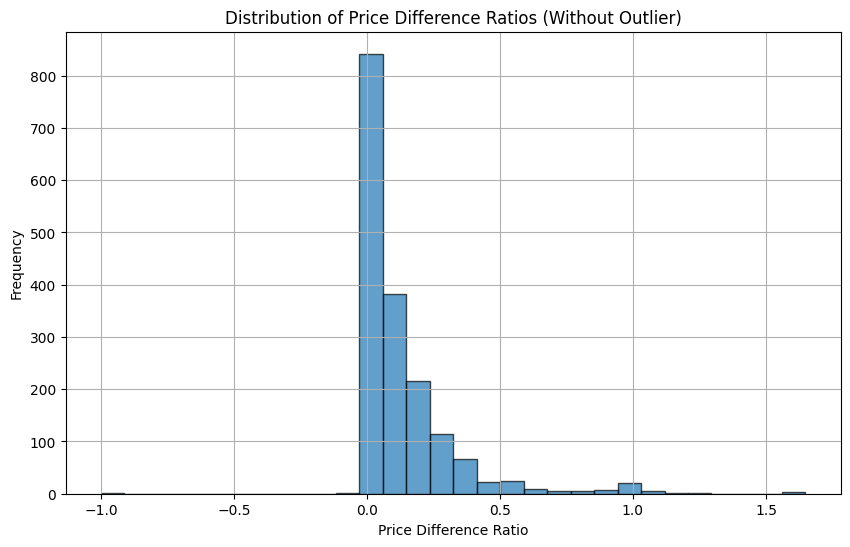

In [ ]:
data_filtered = inventory[(inventory['price_dif'] >= -1) & (inventory['price_dif'] <= 2)]

plt.figure(figsize=(10, 6))
plt.hist(data_filtered['price_dif'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Difference Ratios (Without Outlier)')
plt.xlabel('Price Difference Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
#En el gráfico anterior está excluido un outlier que da un ratio de 13.

In [47]:
vendor_counts_inventory = inventory['vendor'].value_counts().reset_index()
vendor_counts_inventory[:10]

,vendor,count
0,biona,69
1,ecover,34
2,napolina,28
3,faithinnature,27
4,method,26
5,hiderfoods,24
6,greencuisine,24
7,various,23
8,ellaskitchen,18
9,febreze,17


In [48]:
product_type_counts_inventory = inventory['product_type'].value_counts().reset_index()
product_type_counts_inventory[:10]

,product_type,count
0,cleaning-products,160
1,tins-packaged-foods,125
2,snacks-confectionery,122
3,cooking-ingredients,73
4,pasta-rice-noodles,66
5,baby-toddler-food,62
6,condiments-dressings,52
7,cereal,51
8,haircare,50
9,biscuits-crackers,49


In [49]:
exploded_tags_inventory = inventory.explode('tags')

tag_counts_inventory = exploded_tags_inventory['tags'].value_counts().reset_index()
tag_counts_inventory[:10]

,tags,count
0,vegan,673
1,gluten-free,299
2,eco,285
3,cruelty-free,208
4,organic,170
5,b-corp,144
6,discontinue,115
7,christmas,108
8,refills,101
9,pm,72


In [50]:
users = load_data(["users.parquet"])[0]

Loading Parquet file: users.parquet
Successfully loaded users.parquet with 4983 rows and 10 columns.


In [51]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [52]:
users.columns

Index(['user_id', 'user_segment', 'user_nuts1', 'first_ordered_at',
       'customer_cohort_month', 'count_people', 'count_adults',
       'count_children', 'count_babies', 'count_pets'],
      dtype='object')

In [53]:
users["user_segment"].unique()

array(['Top Up', 'Proposition'], dtype=object)

In [54]:
users['user_segment'].value_counts()

user_segment
Top Up         2643
Proposition    2340
Name: count, dtype: int64

In [55]:
users["user_nuts1"].unique()

array(['UKH', 'UKJ', 'UKD', 'UKI', 'UKE', 'UKK', 'UKF', 'UKL', 'UKC',
       'UKG', 'UKM', None, 'UKN'], dtype=object)

In [56]:
users['user_nuts1'].value_counts()

user_nuts1
UKI    1318
UKJ     745
UKK     602
UKH     414
UKD     358
UKM     315
UKE     303
UKG     295
UKF     252
UKL     224
UKC     102
UKN       4
Name: count, dtype: int64

In [57]:
users['customer_cohort_month'] = pd.to_datetime(users['customer_cohort_month'])
users['customer_cohort_month'] = users['customer_cohort_month'].dt.to_period('M')
count_by_cohort = users['customer_cohort_month'].value_counts().sort_index()
count_by_cohort

customer_cohort_month
2020-04      3
2020-05     22
2020-06     35
2020-07     42
2020-08     38
2020-09     68
2020-10     88
2020-11     98
2020-12    109
2021-01    272
2021-02    220
2021-03    205
2021-04    205
2021-05    167
2021-06    185
2021-07    130
2021-08    124
2021-09    108
2021-10    507
2021-11    639
2021-12    454
2022-01    688
2022-02    429
2022-03    147
Freq: M, Name: count, dtype: int64

In [58]:
filtered_users = users.dropna(subset=['count_people'])

In [59]:
filtered_users.head(10)

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01,2.0,2.0,0.0,0.0,0.0
1501,2d20842e0b680c1143a4daaabffd6c7b018b2fe4062a70...,Proposition,UKK,2020-05-11 19:04:39,2020-05,3.0,2.0,0.0,1.0,0.0
2288,a5dc433a53fc583e76e83e4c5221676898982e6ce4c7fb...,Proposition,UKH,2021-11-04 10:10:41,2021-11,2.0,2.0,0.0,0.0,0.0
3294,1b7eba7caa62e5551978b33eefe1385aa51a48b6877246...,Top Up,UKK,2022-01-21 18:48:00,2022-01,1.0,1.0,0.0,0.0,0.0
4569,cc7705f1921269ddd471ee6d303c650659057ac951aa74...,Top Up,UKC,2020-07-31 13:19:50,2020-07,3.0,3.0,0.0,0.0,0.0
3141,a160d68057b656130a5c54749f29004982d73333f6e466...,Proposition,UKL,2022-02-27 16:40:42,2022-02,3.0,3.0,0.0,0.0,0.0


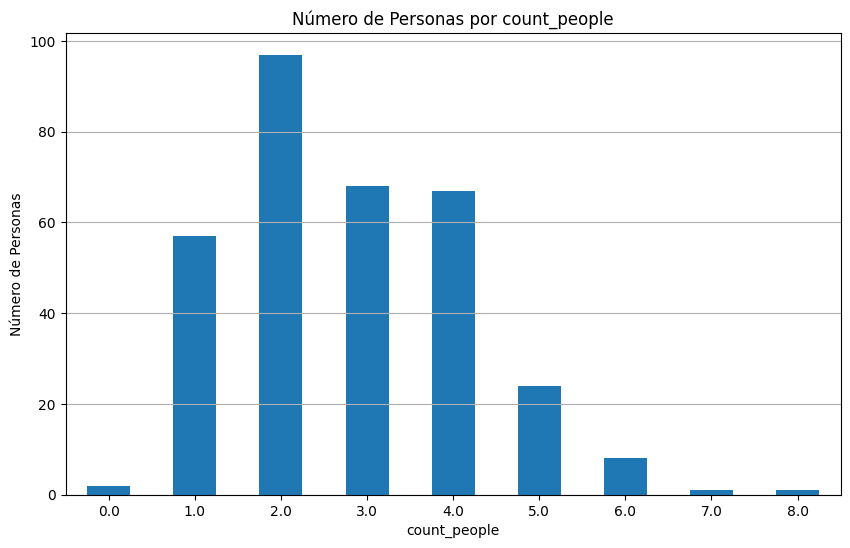

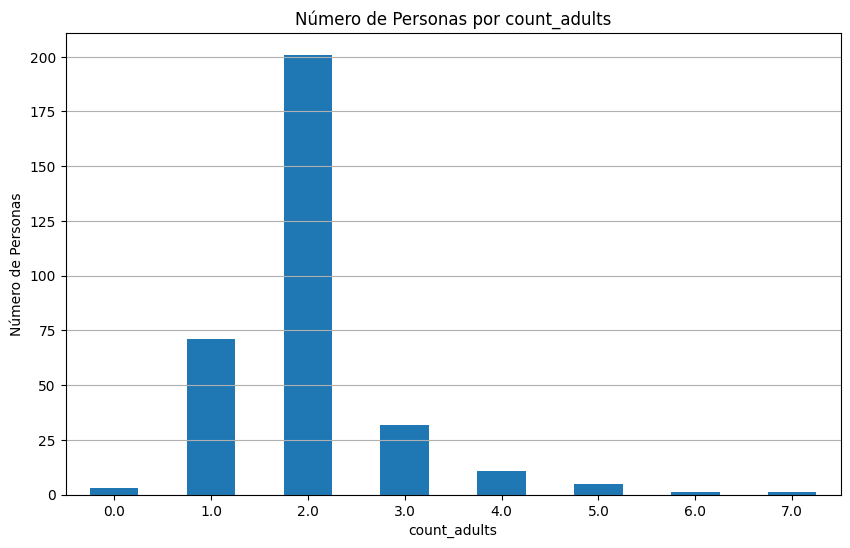

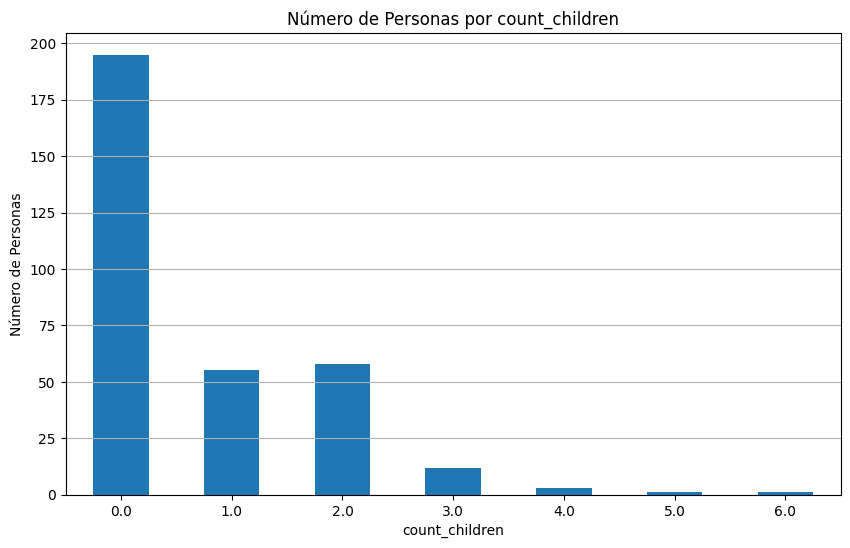

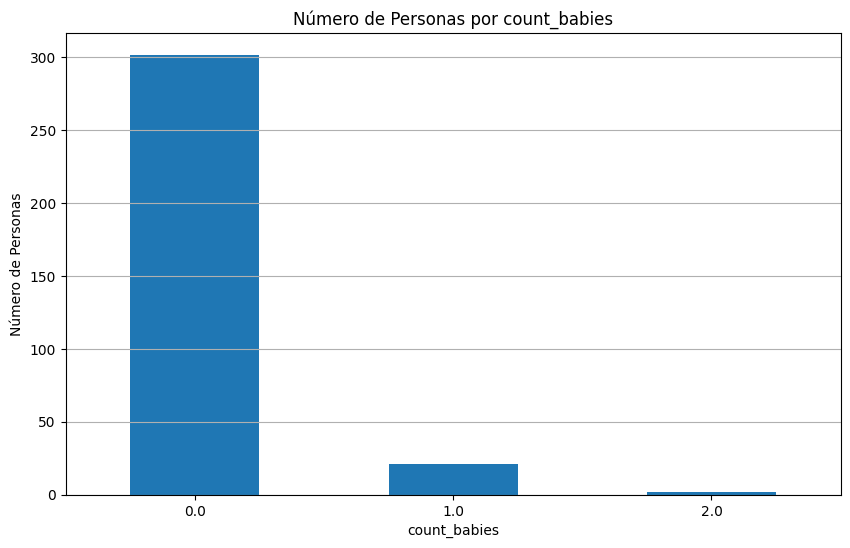

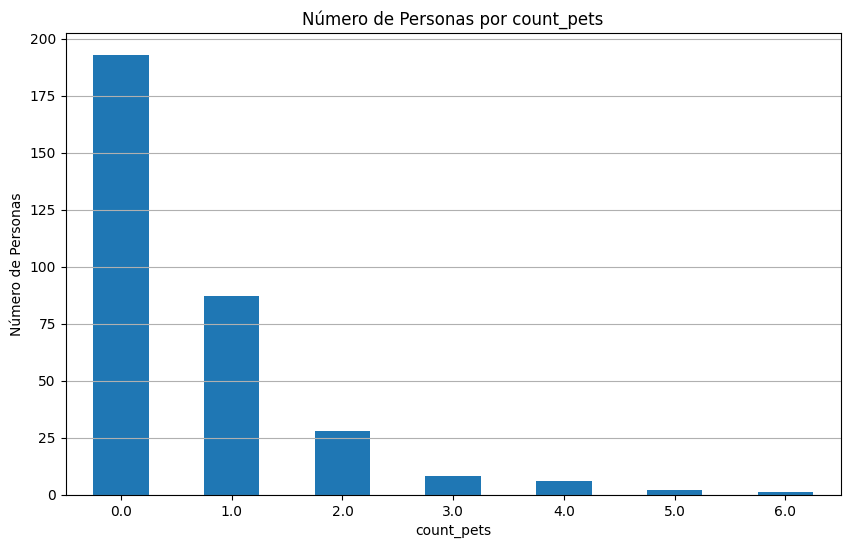

In [ ]:
columns_to_plot_users = ['count_people', 'count_adults', 'count_children', 'count_babies', 'count_pets']

for column in columns_to_plot_users:
    plt.figure(figsize=(10, 6))
    filtered_users[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Número de Personas por {column}')
    plt.xlabel(column)
    plt.ylabel('Número de Personas')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [61]:
dict_families = {}
for col in columns_to_plot_users:

    no_zero = filtered_users[filtered_users[col] != 0]
     
    dict_families[col] =  len(no_zero) / len(filtered_users)

dict_families

{'count_people': 0.9938461538461538,
 'count_adults': 0.9907692307692307,
 'count_children': 0.4,
 'count_babies': 0.07076923076923076,
 'count_pets': 0.40615384615384614}

In [62]:
regulars_merged = regulars.merge(inventory, on= "variant_id", how = "left")
regulars_merged

,user_id,variant_id,created_at,year_month,price,compare_at_price,vendor,product_type,tags,price_range,price_dif
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,2020-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,2020-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,2020-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,2020-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,2020-05,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]","[3.0, 4.0)",0.002865
...,...,...,...,...,...,...,...,...,...,...,...
18100,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13,2022-03,2.59,2.75,oceansaver,cleaning-products,"[all-purpose-cleaner, cruelty-free, eco, vegan]","[2.0, 3.0)",0.061776
18101,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24,2022-03,4.49,9.00,cif,cleaning-products,"[bathroom-limescale-cleaner, refills]","[4.0, 5.0)",1.004454
18102,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24,2022-03,2.69,2.75,marigold,cleaning-products,[sponges-cloths-gloves],"[2.0, 3.0)",0.022305
18103,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24,2022-03,4.19,4.29,cooksco,cooking-ingredients,"[christmas, discontinue, gluten-free, oils]","[4.0, 5.0)",0.023866


In [63]:
monthy_regulars = regulars_merged.groupby('year_month').size()

not_nan_monthly_regulars =  regulars_merged[regulars_merged['price'].notna()].groupby('year_month').size()

(not_nan_monthly_regulars / monthy_regulars) * 100

year_month
2020-04          NaN
2020-05    42.176871
2020-06    53.293413
2020-07    56.983240
2020-08    58.247423
2020-09    62.962963
2020-10    58.359621
2020-11    63.723150
2020-12    73.456790
2021-01    75.130617
2021-02    75.698324
2021-03    73.992322
2021-04    82.423208
2021-05    77.062374
2021-06    83.011583
2021-07    83.204633
2021-08    79.750347
2021-09    83.661645
2021-10    86.913087
2021-11    90.880503
2021-12    89.529164
2022-01    92.617450
2022-02    92.996743
2022-03    92.405063
Freq: M, dtype: float64

In [65]:
regulars_merged.dropna(subset=["vendor"])

,user_id,variant_id,created_at,year_month,price,compare_at_price,vendor,product_type,tags,price_range,price_dif
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,2020-05,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]","[3, 4)",0.002865
8,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667182493828,2020-05-06 14:42:11,2020-05,4.29,5.40,bulldog,skincare,"[cruelty-free, eco, facial-skincare, vegan]","[4, 5)",0.258741
17,d883991facbc3b07b62da342d00c97d1e6cea8d2176695...,33667198910596,2020-07-06 10:12:08,2020-07,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]","[14, 15)",0.104069
18,66a195720d6988ff4d32155cc03631b84f68b34d3b0a1e...,33826459320452,2020-07-06 17:17:52,2020-07,5.09,5.65,treeoflife,snacks-confectionery,"[christmas, nuts-dried-fruit-seeds, organic]","[5, 6)",0.110020
19,0b7e02fee4b9e215da3bdae70050f20c5ffd18264454a5...,33667247276164,2020-07-18 16:56:55,2020-07,2.49,3.00,method,hand-soap-sanitisers,"[cruelty-free, eco, hand-soap, vegan]","[2, 3)",0.204819
...,...,...,...,...,...,...,...,...,...,...,...
18100,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13,2022-03,2.59,2.75,oceansaver,cleaning-products,"[all-purpose-cleaner, cruelty-free, eco, vegan]","[2, 3)",0.061776
18101,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24,2022-03,4.49,9.00,cif,cleaning-products,"[bathroom-limescale-cleaner, refills]","[4, 5)",1.004454
18102,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24,2022-03,2.69,2.75,marigold,cleaning-products,[sponges-cloths-gloves],"[2, 3)",0.022305
18103,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24,2022-03,4.19,4.29,cooksco,cooking-ingredients,"[christmas, discontinue, gluten-free, oils]","[4, 5)",0.023866


In [70]:
regulars_merged["vendor"].value_counts(normalize = True).head(10)

vendor
ecover        0.055674
method        0.047093
biona         0.043834
oatly         0.023680
fairy         0.020487
mutti         0.018757
treeoflife    0.017228
andrex        0.016230
finish        0.014700
napolina      0.014434
Name: proportion, dtype: float64

In [71]:
regulars_merged["product_type"].value_counts(normalize = True).head(10)

product_type
cleaning-products                  0.124850
tins-packaged-foods                0.093255
dishwashing                        0.055474
toilet-roll-kitchen-roll-tissue    0.053346
cooking-ingredients                0.052148
snacks-confectionery               0.043900
long-life-milk-substitutes         0.037648
condiments-dressings               0.034655
soft-drinks-mixers                 0.032061
cereal                             0.031329
Name: proportion, dtype: float64

In [79]:
ordered_items = orders.explode("ordered_items").rename({"ordered_items":"variant_id"}, axis = 1)

In [83]:
ordered_items = ordered_items.merge(inventory, on = "variant_id", how = "left")

In [85]:
ordered_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,list_length,year_month,price,compare_at_price,vendor,product_type,tags,price_range,price_dif
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,10,2020-05,4.19,5.10,listerine,dental,[mouthwash],"[4, 5)",0.217184
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,10,2020-05,4.19,5.10,listerine,dental,[mouthwash],"[4, 5)",0.217184
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,8,2020-05,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v...","[17, 18)",0.147860
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,8,2020-05,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,...","[9, 10)",0.201201
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,8,2020-05,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]","[5, 6)",0.032815


In [92]:
unique_items_ordered = ordered_items.drop_duplicates(subset=['id', 'product_type'])

product_type_counts_orders = unique_items_ordered['product_type'].value_counts()
product_type_counts_orders/len(orders)

product_type
cleaning-products                  0.398951
tins-packaged-foods                0.373988
toilet-roll-kitchen-roll-tissue    0.356890
long-life-milk-substitutes         0.302861
dishwashing                        0.300011
snacks-confectionery               0.218853
cooking-ingredients                0.207113
soft-drinks-mixers                 0.204377
condiments-dressings               0.197424
cereal                             0.188419
fabric-softener-freshener          0.185227
dental                             0.168699
cooking-sauces                     0.168243
spreads                            0.160492
pasta-rice-noodles                 0.160036
hand-soap-sanitisers               0.158783
biscuits-crackers                  0.136555
home-baking                        0.117406
washing-liquid-gel                 0.116038
haircare                           0.101448
tea                                0.101220
bin-bags                           0.094266
washing-capsules   

In [101]:
values_orders = ordered_items.groupby('id')['price'].sum().reset_index()
values_orders.rename(columns={"price":"value"})

,id,value
0,2204073066628,0.00
1,2204707520644,0.00
2,2204838822020,0.00
3,2208967852164,0.00
4,2215889436804,8.38
...,...,...
8768,4026096910468,79.13
8769,4026464993412,43.41
8770,4026553434244,43.96
8771,4026656030852,63.96


In [102]:
values_orders.describe()

,id,price
count,8.773000e+03,8773.000000
mean,3.684684e+12,55.832173
std,4.145437e+11,24.316070
min,2.204073e+12,0.000000
25%,3.690255e+12,44.250000
50%,3.846692e+12,51.860000
75%,3.945086e+12,60.590000
max,4.026732e+12,319.800000


In [9]:
sample_data = load_data(["feature_frame.csv"])[0]

Loading CSV file: feature_frame.csv
Successfully loaded feature_frame.csv with 2880549 rows and 27 columns.


In [7]:
sample_data.info()
sample_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [8]:
sample_data.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [9]:
sample_data.describe()

,variant_id,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,...,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,...,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00
min,3.361529e+13,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01


In [11]:
sample_data["outcome"].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [12]:
sample_data["active_snoozed"].value_counts()

active_snoozed
0.0    2873952
1.0       6597
Name: count, dtype: int64

In [19]:
sample_data["set_as_regular"].value_counts()

set_as_regular
0.0    2870093
1.0      10456
Name: count, dtype: int64

In [20]:
sample_data["abandoned_before"].value_counts()

abandoned_before
0.0    2878794
1.0       1755
Name: count, dtype: int64

In [18]:
sample_data["global_popularity"].value_counts().sort_index()

global_popularity
0.000000    480284
0.000678      2852
0.000687      4817
0.000698      3377
0.000709      3754
             ...  
0.418058        28
0.418196        48
0.420221        41
0.422240        34
0.425439        36
Name: count, Length: 5968, dtype: int64

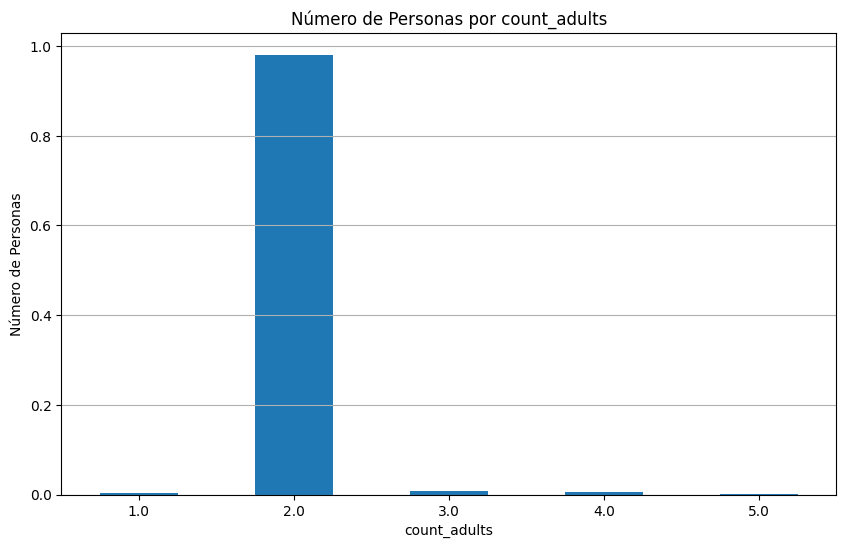

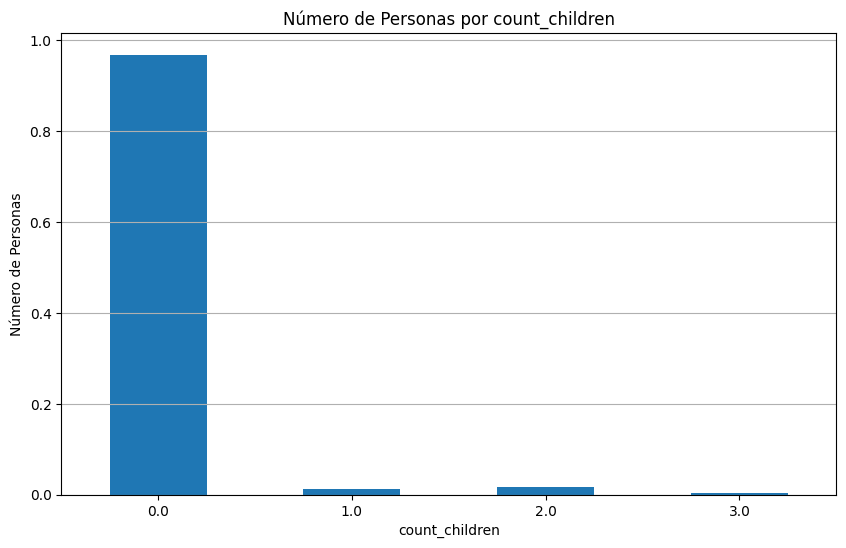

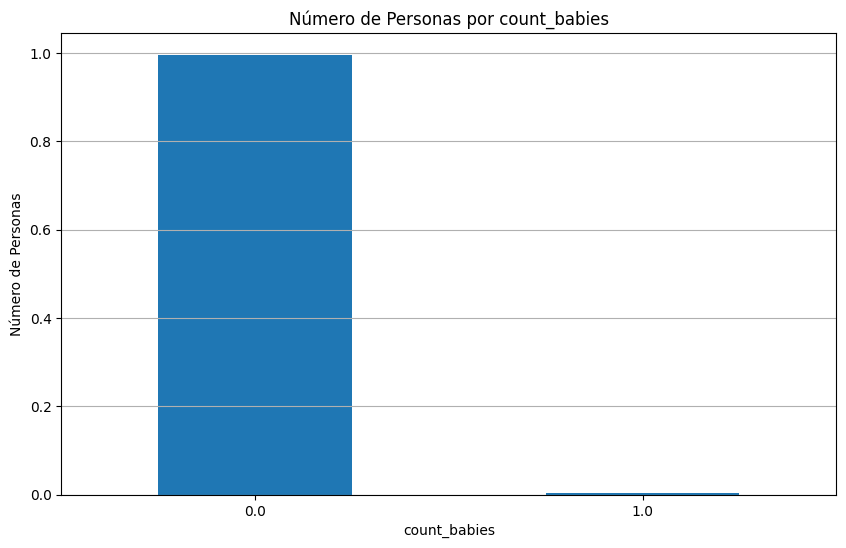

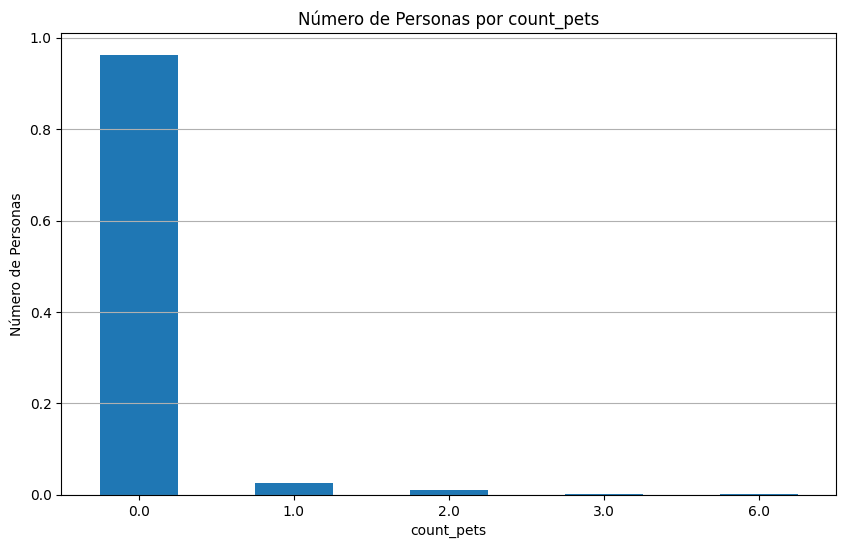

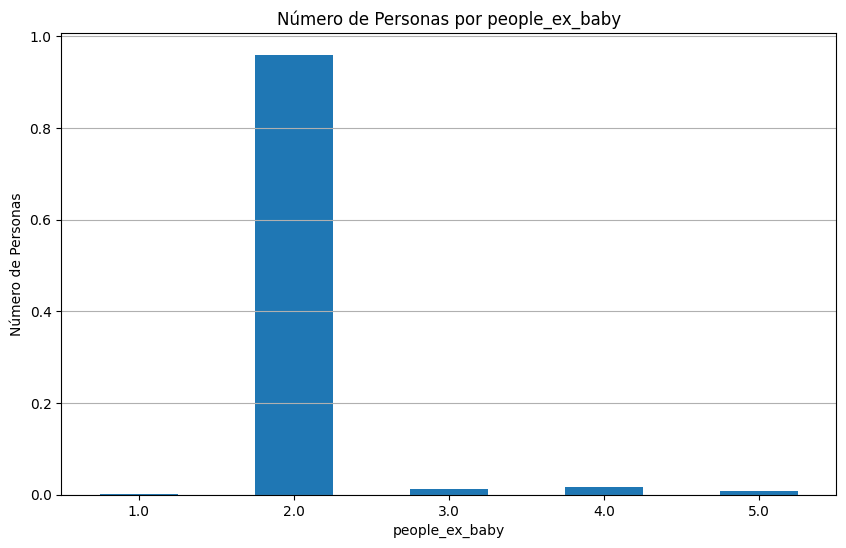

In [23]:
columns_to_plot_sample_data = ['count_adults', 'count_children', 'count_babies', 'count_pets', "people_ex_baby"]

for column in columns_to_plot_sample_data:
    plt.figure(figsize=(10, 6))
    sample_data[column].value_counts(normalize = 'True').sort_index().plot(kind='bar')
    plt.title(f'Número de Personas por {column}')
    plt.xlabel(column)
    plt.ylabel('Número de Personas')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

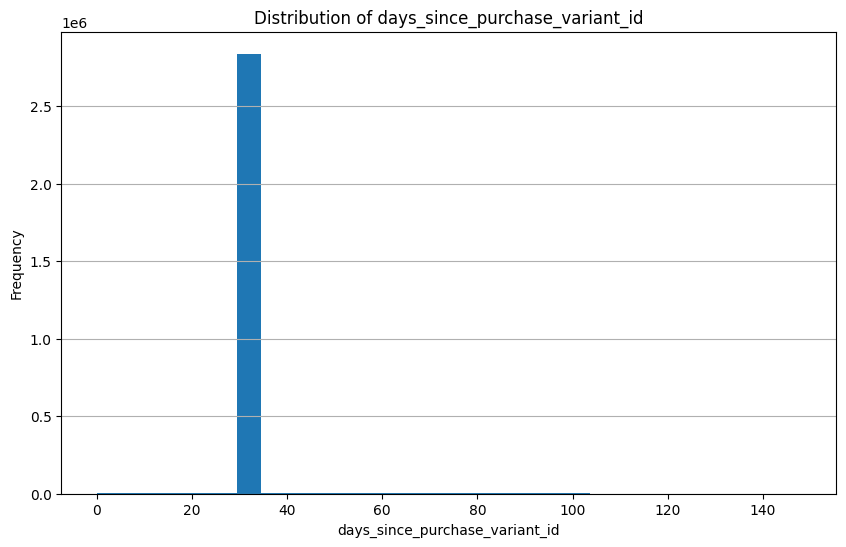

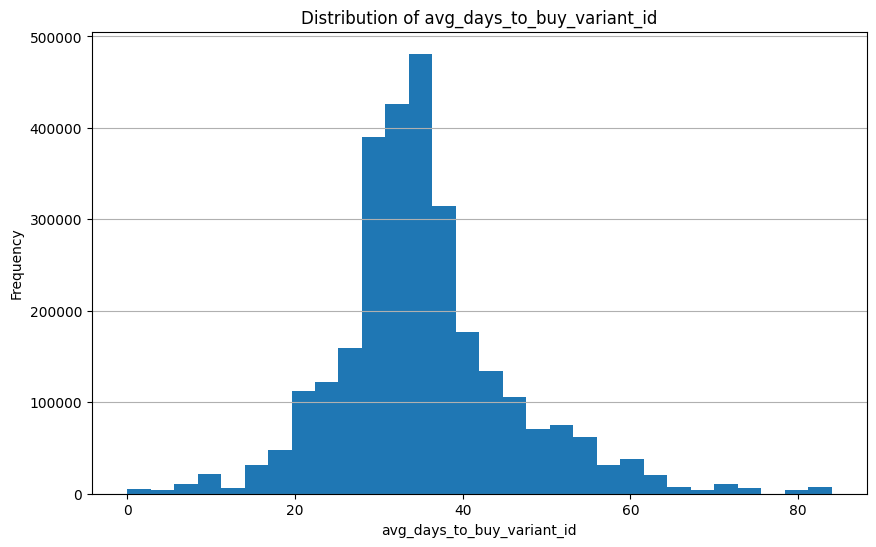

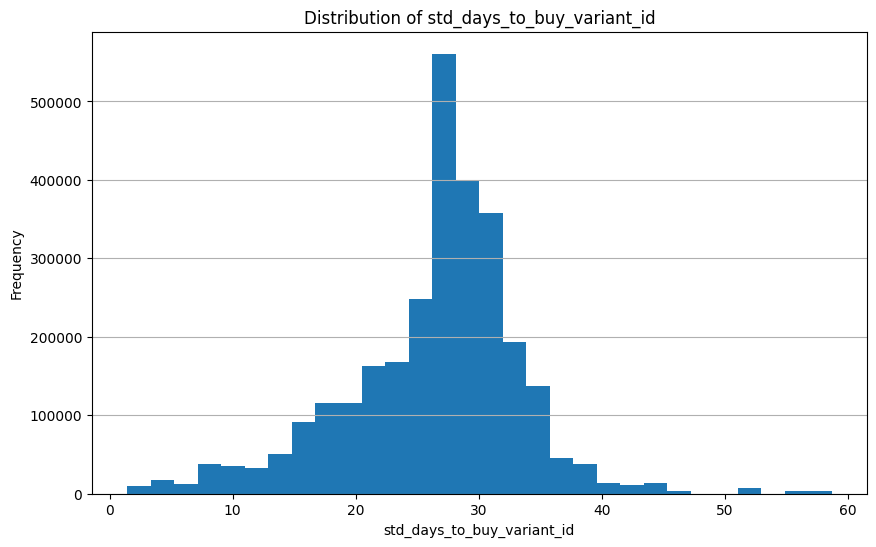

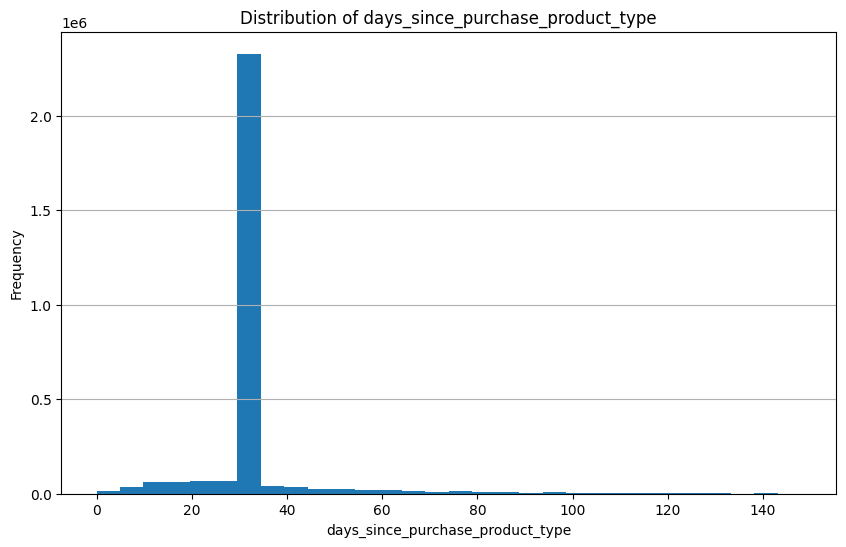

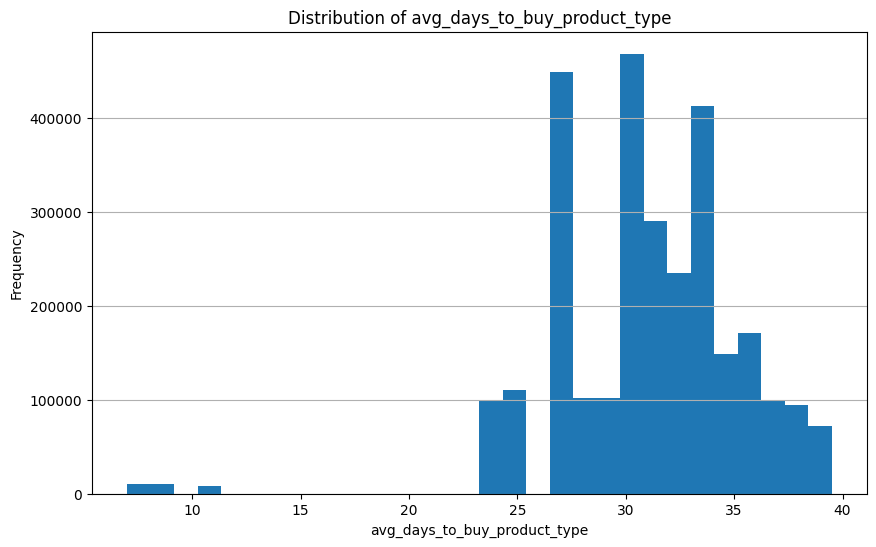

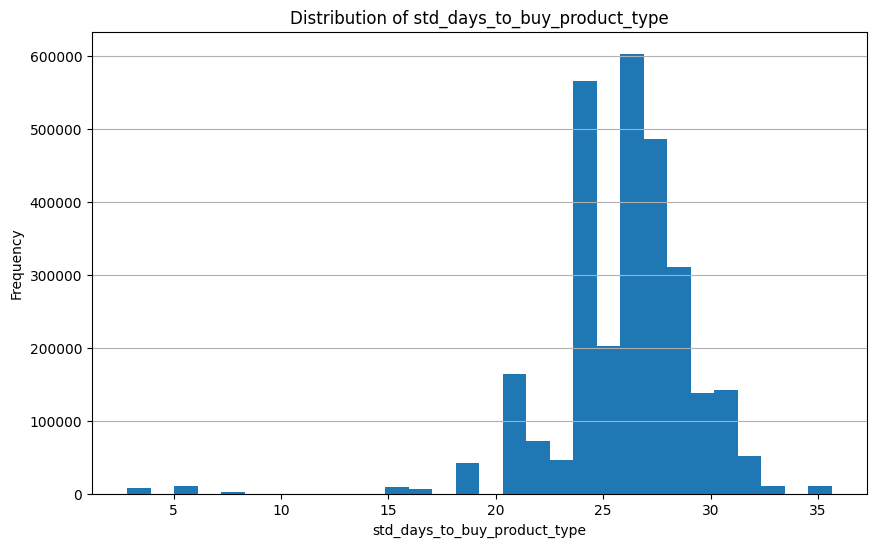

In [29]:
sample_data_sales_cols = [
    'days_since_purchase_variant_id',
    'avg_days_to_buy_variant_id', 
    'std_days_to_buy_variant_id',
    'days_since_purchase_product_type', 
    'avg_days_to_buy_product_type',
    'std_days_to_buy_product_type']

for col in sample_data_sales_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(sample_data[col], bins = 30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
    

In [10]:
numeric_cols = sample_data.select_dtypes(include='number')
numeric_cols

,variant_id,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,2807985930372,3482464092292,3,0.0,0.0,0.0,0.0,0.0,0.081052,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
1,33826472919172,2808027644036,3466586718340,2,0.0,0.0,0.0,0.0,0.0,0.081052,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
2,33826472919172,2808099078276,3481384026244,4,0.0,0.0,0.0,0.0,0.0,0.081052,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
3,33826472919172,2808393957508,3291363377284,2,0.0,0.0,0.0,0.0,0.0,0.081052,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
4,33826472919172,2808429314180,3537167515780,3,0.0,0.0,0.0,0.0,0.0,0.081052,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880544,33826439594116,3643254800516,3893722808452,3,0.0,0.0,0.0,0.0,0.0,0.417186,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880545,33826439594116,3643274788996,3883757174916,4,0.0,0.0,0.0,0.0,0.0,0.417186,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880546,33826439594116,3643283734660,3874925314180,7,0.0,0.0,0.0,0.0,0.0,0.417186,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880547,33826439594116,3643294515332,3906490826884,2,0.0,0.0,0.0,0.0,0.0,0.417186,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


In [18]:
relevant_numeric_cols = numeric_cols.iloc[:, 4:]
relevant_numeric_cols

,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
1,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
4,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880544,0.0,0.0,0.0,0.0,0.0,0.417186,0.114360,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880545,0.0,0.0,0.0,0.0,0.0,0.417186,0.114360,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880546,0.0,0.0,0.0,0.0,0.0,0.417186,0.114360,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880547,0.0,0.0,0.0,0.0,0.0,0.417186,0.114360,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


In [21]:
corr_matrix = relevant_numeric_cols.corr()
corr_matrix

,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
outcome,1.000000,0.211139,0.163332,0.045763,0.134621,-0.019512,0.001369,0.162628,0.004572,0.006844,0.001281,0.008714,0.008120,0.022814,-0.019940,-0.009084,0.010520,-0.015965,-0.011723
ordered_before,0.211139,1.000000,0.056228,0.252518,0.301175,-0.030266,0.001462,0.144204,0.015346,0.021970,0.021644,0.028876,0.026421,0.237913,0.004030,0.019597,0.037712,-0.001165,0.004118
abandoned_before,0.163332,0.056228,1.000000,0.014122,0.018628,-0.004732,0.000470,0.031376,0.000071,0.007068,0.001846,0.003917,0.005910,-0.033269,-0.001400,0.001665,-0.010569,-0.001087,-0.000387
active_snoozed,0.045763,0.252518,0.014122,1.000000,0.086714,-0.007656,0.004606,0.026256,0.014592,0.043702,0.037628,0.042228,0.044076,0.045223,0.008733,0.015562,0.015152,0.009996,0.011424
set_as_regular,0.134621,0.301175,0.018628,0.086714,1.000000,-0.007777,-0.002137,0.081922,0.012918,0.017419,0.006222,0.016630,0.021348,0.101787,-0.009677,-0.003152,0.019920,-0.007162,-0.005374
normalised_price,-0.019512,-0.030266,-0.004732,-0.007656,-0.007777,1.000000,-0.063929,-0.105252,-0.000366,0.000311,-0.000347,0.000045,0.000063,-0.009639,-0.000603,-0.025001,-0.017590,-0.082015,-0.153675
discount_pct,0.001369,0.001462,0.000470,0.004606,-0.002137,-0.063929,1.000000,0.007899,0.000446,0.000185,0.000857,0.000341,0.000391,-0.000129,0.022596,0.024294,-0.000871,0.154584,0.150793
global_popularity,0.162628,0.144204,0.031376,0.026256,0.081922,-0.105252,0.007899,1.000000,0.001234,0.002510,0.004531,0.001670,0.002742,-0.002365,-0.091277,-0.029327,0.004114,-0.060922,-0.043375
count_adults,0.004572,0.015346,0.000071,0.014592,0.012918,-0.000366,0.000446,0.001234,1.000000,0.029880,-0.005005,0.156165,0.557051,0.008226,0.001484,0.001840,0.001281,0.001312,0.001582
count_children,0.006844,0.021970,0.007068,0.043702,0.017419,0.000311,0.000185,0.002510,0.029880,1.000000,0.171882,0.499747,0.846752,0.011955,0.001188,0.002809,0.037283,-0.000937,-0.001147


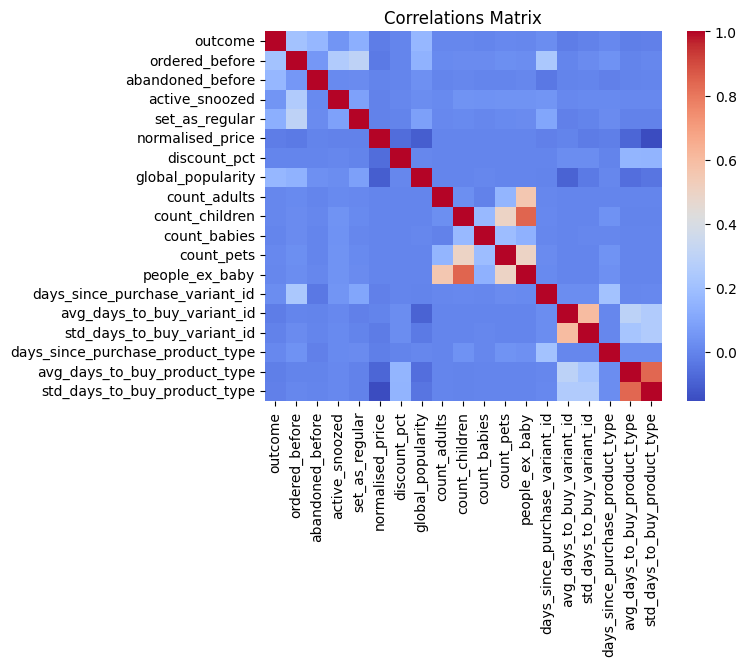

In [22]:

plt.figure()
sns.heatmap(corr_matrix, annot = False, cmap ='coolwarm', fmt = '.2f')
plt.title("Correlations Matrix")
plt.show()

Insights: 

1. The data cover a 3 year period of a supermarket. 
2. Regarding orders, most of users have ordered only a few times (half of them only once) and most orders  are 5 to 15 items. 
3. The orders do not concentrate in a few products, top 10 products represent 15% of all ordered items.  
4. Orders have grown through time achiving up to 1000 in the latest months. 
5. Regulars product have mostly been added in the latest months and are also divided in a huge variety of items (now top 20 items cover only 10% of all saved items).
6. The abandoned carts also grow over time and most of them are shorter than the average order (most common abandned cart size is 1 to 5 items). 
7. The inventory covers 2000 products, although some pricing information is missing (all prices correspond to present price and some products are priced with 0). Most products have prices form 0 to 5.
8. The most common tags are vegan, gluten free, eco, cruelty-free and organic, suggesting that might be a "eco friendly" supermarket.
9. The users df corresponds to uk costumers (nuts1) and the number of costumers regsiterd has grown moth over month.
10. In the users file, most of the information is missing about family composition (only ~6%).
11. Most of these families don´t have pets, babies or children  and most of them are formed by adults (mainly 2). 
12. Our top vendors represent up to 5% of all regulars. Most of them are "eco friendly" producers.
13. The most succesfull products are packaged foods nad cleaning products (20%). In fact, 40% of orders hace cleaning products, and 37% hace packaged food.
14. Partial information on earlier orders, but from the ones we know, they are worth 50€ on average (half of them are between 40 to 60€).
15. In the EDA, each row represents a product and an order, so makes sense that most binary variables are 0.
16. In the EDA, for the family composition, we find a huge number of inputed values (always the mean).Same thing happens with the days since purchase.
17. In the EDA, from the correlations matrix we can see that outcome (target variable) os mostly correlated to popularity or to ordered, abandoned or set as regular, in other words, if the user has already seen this product. 